In [1]:
from matplotlib import pyplot as plt
import numpy as np

NAME | COMMENT
-----|---------
**label_names** | The array contains label names.
**train_data** | The array contains images with shape of (3, 32, 32)
**train_label** | The array contains images' label.
**filenames** | The array contains images' name.

In [20]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

train_data = None
train_label = []
train_filenames = []
test_data = None
test_label = []
test_filenames = []

meta_data = unpickle('./cifar-10-batches-py/batches.meta')
label_names = np.array(meta_data[b'label_names'])

for i in range(1, 6):
    data_dict = unpickle('./cifar-10-batches-py/data_batch_{}'.format(i))
    if i == 1:
        train_data = data_dict[b'data']
    else:
        train_data = np.vstack((train_data, data_dict[b'data']))
    train_label += data_dict[b'labels']
    train_filenames += data_dict[b'filenames']

train_data = train_data.reshape((len(train_data), 3, 32, 32)).transpose(0, 2, 3, 1) / 255.0
train_label = np.array(train_label)
print('Train Data Shape: ', train_data.shape, ' Train Label Shape: ', train_label.shape)

data_dict = unpickle('./cifar-10-batches-py/test_batch')
test_data = data_dict[b'data']
test_data = test_data.reshape((len(test_data), 3, 32, 32,)).transpose(0, 2, 3, 1) / 255.0
test_label = data_dict[b'labels']
test_label = np.array(test_label)
test_filenames = data_dict[b'filenames']
print('Test Data Shape: ', test_data.shape, ' Test Label Shape: ', test_label.shape)

Train Data Shape:  (50000, 32, 32, 3)  Train Label Shape:  (50000,)
Test Data Shape:  (10000, 32, 32, 3)  Test Label Shape:  (10000,)


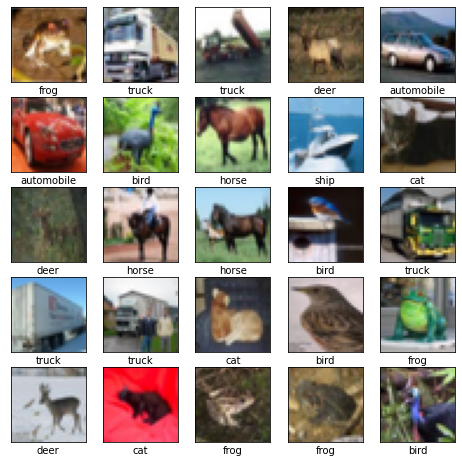

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

In [17]:
import tensorflow as tf
from tensorflow.keras import models, layers

tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [21]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_data, train_label, epochs=10, validation_data=(test_data, test_label))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 77s 2ms/sample - loss: 1.4896 - accuracy: 0.4576 - val_loss: 1.2175 - val_accuracy: 0.5737
Epoch 2/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 1.1371 - accuracy: 0.5994 - val_loss: 1.0855 - val_accuracy: 0.6189
Epoch 3/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 1.0015 - accuracy: 0.6459 - val_loss: 1.1023 - val_accuracy: 0.6179
Epoch 4/10
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.9116 - accuracy: 0.6815 - val_loss: 1.0113 - val_accuracy: 0.6496
Epoch 5/10
50000/50000 [==============================] - 76s 2ms/sample - loss: 0.8469 - accuracy: 0.7034 - val_loss: 0.9292 - val_accuracy: 0.6790
Epoch 6/10
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.7863 - accuracy: 0.7245 - val_loss: 0.9094 - val_accuracy: 0.6883
Epoch 7/10
50000/50000 [==============================] 

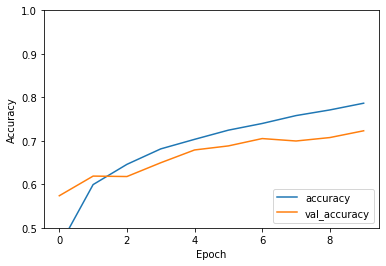

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [23]:
test_loss, test_acc = model.evaluate(test_data, test_label, verbose=2)

10000/10000 - 3s - loss: 0.8287 - accuracy: 0.7231
